In [5]:
import tensorflow as tf

from tensorflow.keras import layers, models

In [4]:
tf.__version__

'2.16.2'

In [6]:
def BasicBlock(x, filters, stride = 1):
    shortcut = x
    x = layers.Conv2D(filters, kernel_size = (3, 3), strides = stride, padding = "same", kernel_initializer = "he_normal")(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv2D(filters, kernel_size = (3, 3), strides = 1, padding = "same", kernel_initializer = "he_normal")(x)
    x = layers.BatchNormalization()(x)
    if stride != 1 or shortcut.shape[-1] != filters:
        shortcut = layers.Conv2D(filters, kernel_size = 1, strides = stride, padding = "same", kernel_initializer = "he_normal")(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)
    x = layers.Add()([x + shortcut])
    x = layers.BatchNormalization()(x)
    return x

In [7]:
def make_layers(x, filters, blocks, stride):
    x = BasicBlock(x, filters, stride = stride)
    for _ in range(1, blocks):
        x = BasicBlock(x, filters, stride = 1)
    return x

In [25]:
def ResNet34(input_shape = (32, 32, 3), num_classes = 10):
    inputs = layers.Input(shape = input_shape)
    x = layers.Conv2D(filters = 64, kernel_size = 7, strides = 2, padding = "same", kernel_initializer = "he_normal")(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling2D(pool_size = 3, strides = 2)(x)

    x = make_layers(x, filters = 64, blocks = 3, stride = 1)
    x = make_layers(x, filters = 128, blocks = 4, stride = 2)
    x = make_layers(x, filters = 256, blocks = 6, stride = 2)
    x = make_layers(x, filters = 512, blocks = 3, stride = 2)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation = "softmax")(x)
    model = models.Model(inputs = inputs, outputs = x)
    return model

In [26]:
model = ResNet34()

In [27]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [29]:
import numpy as np

dummy_in = np.random.randn(1, 32, 32, 3).astype(np.float32)
dummy_out = model(dummy_in)

In [30]:
dummy_out.shape

TensorShape([1, 10])

## Training

In [31]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [32]:
X_train = X_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [33]:
batch_size = 64
epochs = 40

In [34]:
history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    verbose = 2
)

782/782 - 1447s - 2s/step - accuracy: 0.4783 - loss: 1.4692 - val_accuracy: 0.1650 - val_loss: 499.1818


In [35]:
!pip install matplotlib

  Using cached matplotlib-3.9.4-cp39-cp39-macosx_10_12_x86_64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp39-cp39-macosx_10_9_x86_64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-macosx_10_9_x86_64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.9.4-cp39-cp39-macosx_10_12_x86_64.whl (7.9 MB)
Using cached contourpy-1.3.0-cp39-cp39-macosx_10_9_x86_64.whl (265 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 18.0 MB/s  0:00:00
Using cached kiwisolver-1.4.7-cp39-cp39-macosx_10_9_x86_64.whl (65 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 29.5 MB/s  0:00:00
Using cached pyparsing-3.2.3-py3-none-any.whl (111 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


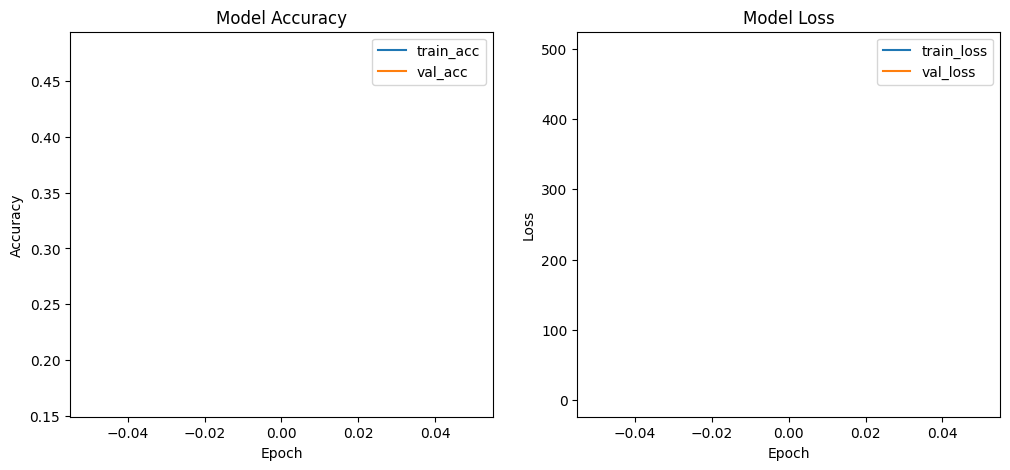

In [36]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
